**This notebook is used for data cleaning and reasoning, the final file with just cleaning is under src/datacleaning.py**

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
df_data = pd.read_csv("../data/raw/diabetic_data.csv")
df_mapping = pd.read_csv("../data/raw/IDS_mapping.csv", header=None, names=["C1", "C2"])

print(df_data.info())
print(df_mapping.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [142]:
# Check if there are any duplicates in encounter_id, drop if no
df_data[df_data['encounter_id'].duplicated()]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [143]:
df_data.drop('encounter_id', axis=1, inplace=True)
df_data.iloc[:, :5].head()  # first 5 columns

,patient_nbr,race,gender,age,weight
0,8222157,Caucasian,Female,[0-10),?
1,55629189,Caucasian,Female,[10-20),?
2,86047875,AfricanAmerican,Female,[20-30),?
3,82442376,Caucasian,Male,[30-40),?
4,42519267,Caucasian,Male,[40-50),?


In [144]:
# drop race column as race has nothing to do with health
df_data.drop('race', axis=1, inplace=True)
df_data.iloc[:, :5].head()

,patient_nbr,gender,age,weight,admission_type_id
0,8222157,Female,[0-10),?,6
1,55629189,Female,[10-20),?,1
2,86047875,Female,[20-30),?,1
3,82442376,Male,[30-40),?,1
4,42519267,Male,[40-50),?,1


In [145]:
print(f'Duplicate patients: {df_data["patient_nbr"].value_counts()[lambda x: x >= 2].count()}')
print(f'Patients with at least 5 entries: {df_data['patient_nbr'].value_counts()[lambda x: x >= 5].count()}')
print(f'Unique patients: {df_data['patient_nbr'].nunique()}')

Duplicate patients: 16773
Patients with at least 5 entries: 1590
Unique patients: 71518


In [146]:
print(df_data['gender'].value_counts(normalize=True) * 100)

gender
Female             53.758623
Male               46.238429
Unknown/Invalid     0.002948
Name: proportion, dtype: float64


In [147]:
df_data = df_data[df_data['gender'] != 'Unknown/Invalid'] # remove Unknown

In [148]:
df_data['weight'].describe()

count     101763
unique        10
top            ?
freq       98566
Name: weight, dtype: object

In [149]:
df_data.drop('weight', axis=1, inplace=True) # drop weight as not enough values
df_data.iloc[:, :5].head()  # first 5 columns

,patient_nbr,gender,age,admission_type_id,discharge_disposition_id
0,8222157,Female,[0-10),6,25
1,55629189,Female,[10-20),1,1
2,86047875,Female,[20-30),1,1
3,82442376,Male,[30-40),1,1
4,42519267,Male,[40-50),1,1


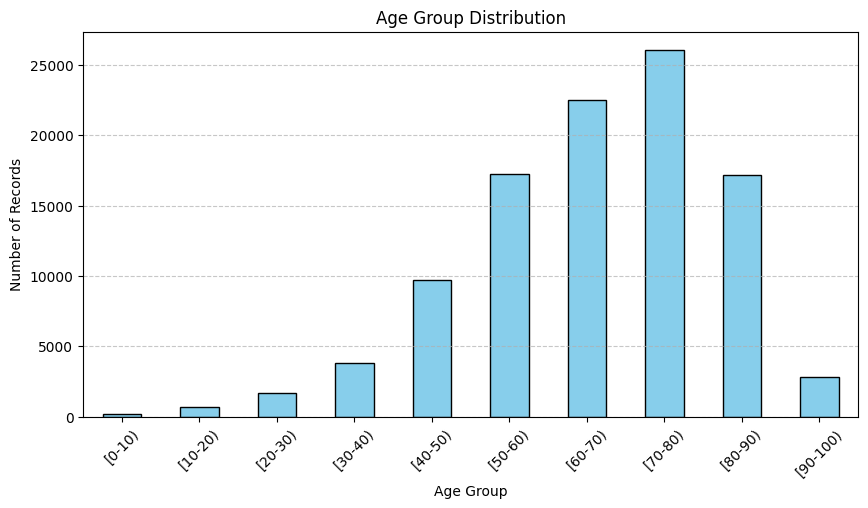

In [150]:
# plot age categories
age_counts = df_data['age'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
age_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [151]:
df_data.drop('payer_code', axis=1, inplace=True) # drop columns as not relevant for readmission
df_data.drop('medical_specialty', axis=1, inplace=True)

In [152]:
print(df_data[['diag_1', 'diag_2', 'diag_3']].isnull().sum())
print(df_data[['diag_1', 'diag_2', 'diag_3']].eq('?').sum())

diag_1    0
diag_2    0
diag_3    0
dtype: int64
diag_1      21
diag_2     358
diag_3    1423
dtype: int64


In [153]:
df_data = df_data[df_data['diag_1'] != '?'] # drop those 21 rows with unknown first diagnose
print(df_data[['diag_2', 'diag_3']].eq('?').sum())

diag_2     357
diag_3    1422
dtype: int64


In [154]:
df_data[['diag_2', 'diag_3']] = df_data[['diag_2', 'diag_3']].replace('?', 'Unknown') # replace ? by unknown
print(df_data[['diag_2', 'diag_3']].eq('?').sum())

diag_2    0
diag_3    0
dtype: int64


In [155]:
print(f'Min value of diag1: {df_data['diag_1'].min()} \nMax value of diag1: {df_data['diag_1'].max()}')
print(f'Number of codes with letters: {df_data['diag_1'].astype(str).str.contains('[A-Za-z]', na=False).sum()}')
df_data['diag_1'].value_counts().sort_index() # ICD9 codes, no need for cleaning but categorization in future steps

Min value of diag1: 10 
Max value of diag1: V71
Number of codes with letters: 1645


diag_1
10      1
11     10
110     2
112    73
114     1
       ..
V63     8
V66     2
V67     1
V70     1
V71     9
Name: count, Length: 716, dtype: int64

In [156]:
print(df_data['tolbutamide'])
df_data.drop('tolbutamide', axis=1, inplace=True) # only No as value, doesn't help with prediction

0         No
1         No
2         No
3         No
4         No
          ..
101761    No
101762    No
101763    No
101764    No
101765    No
Name: tolbutamide, Length: 101742, dtype: object


In [157]:
print(df_data[df_data['examide']!='No']) # Empty dataframe
df_data.drop('examide', axis=1, inplace=True)

Empty DataFrame
Columns: [patient_nbr, gender, age, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed, readmitted]
Index: []

[0 rows x 44 columns]


In [158]:
print(df_data[df_data['citoglipton']!='No']) # Empty dataframe
df_data.drop('citoglipton', axis=1, inplace=True)

Empty DataFrame
Columns: [patient_nbr, gender, age, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed, readmitted]
Index: []

[0 rows x 43 columns]


In [159]:
print((df_data['glyburide-metformin']!='No').sum())
print((df_data['glipizide-metformin']!='No').sum())
print((df_data['glimepiride-pioglitazone']!='No').sum())
print((df_data['metformin-rosiglitazone']!='No').sum())
print((df_data['metformin-pioglitazone']!='No').sum())
# impact of these columns to low, 706 of 100'000, less than 1%
df_data.drop(
    ['glyburide-metformin', 'glipizide-metformin',
     'glimepiride-pioglitazone', 'metformin-rosiglitazone',
     'metformin-pioglitazone'],
    axis=1,
    inplace=True
)



706
13
1
2
1


In [160]:
df_data['change'] = df_data['change'].map({'No': False, 'Ch': True}) # switch from Ch and No to true and false
df_data['change'].value_counts()

change
False    54741
True     47001
Name: count, dtype: int64

In [161]:
df_data['readmitted'] = df_data['readmitted'].apply(lambda x: False if x == 'NO' else True) # for now only true and false, later maybe differ between less or more than 30 days
df_data['readmitted'].value_counts()

readmitted
False    54849
True     46893
Name: count, dtype: int64

In [162]:
df_data.head()

,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,change,diabetesMed,readmitted
0,8222157,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,False,No,False
1,55629189,Female,[10-20),1,1,7,3,59,0,18,...,No,No,No,No,No,No,Up,True,Yes,True
2,86047875,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,False,Yes,False
3,82442376,Male,[30-40),1,1,7,2,44,1,16,...,No,No,No,No,No,No,Up,True,Yes,False
4,42519267,Male,[40-50),1,1,7,1,51,0,8,...,No,No,No,No,No,No,Steady,True,Yes,False


In [163]:
print(df_data['max_glu_serum'].value_counts())
print(df_data['max_glu_serum'].isna())
df_data['max_glu_serum'].fillna(0, inplace=True)



max_glu_serum
Norm    2596
>200    1485
>300    1264
Name: count, dtype: int64
0         True
1         True
2         True
3         True
4         True
          ... 
101761    True
101762    True
101763    True
101764    True
101765    True
Name: max_glu_serum, Length: 101742, dtype: bool


C:\Users\taula\AppData\Local\Temp\ipykernel_31340\1023640784.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_data['max_glu_serum'].fillna(0, inplace=True)


In [164]:
print(df_data['A1Cresult'].value_counts())
print(df_data['A1Cresult'].isna())
df_data['A1Cresult'].fillna(0, inplace=True)

A1Cresult
>8      8214
Norm    4989
>7      3812
Name: count, dtype: int64
0          True
1          True
2          True
3          True
4          True
          ...  
101761    False
101762     True
101763     True
101764     True
101765     True
Name: A1Cresult, Length: 101742, dtype: bool


C:\Users\taula\AppData\Local\Temp\ipykernel_31340\1815748170.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_data['A1Cresult'].fillna(0, inplace=True)


In [165]:
# replace the id's with the description
# first divide the mappings in different df
start_admission = df_mapping.index[df_mapping.iloc[:, 0] == 'admission_type_id'][0]
start_discharge = df_mapping.index[df_mapping.iloc[:, 0] == 'discharge_disposition_id'][0]
start_source = df_mapping.index[df_mapping.iloc[:, 0] == 'admission_source_id'][0]

df_admission_type = df_mapping.iloc[start_admission + 1 : start_discharge]
df_discharge_disposition = df_mapping.iloc[start_discharge + 1 : start_source]
df_admission_source = df_mapping.iloc[start_source + 1 :]

df_admission_type.columns = ['admission_type_id', 'description']
df_discharge_disposition.columns = ['discharge_disposition_id', 'description']
df_admission_source.columns = ['admission_source_id', 'description']

print(df_admission_type.head())
print(df_discharge_disposition.head())
print(df_admission_source.head())

  admission_type_id    description
1                 1      Emergency
2                 2         Urgent
3                 3       Elective
4                 4        Newborn
5                 5  Not Available
   discharge_disposition_id                                        description
11                        1                                 Discharged to home
12                        2  Discharged/transferred to another short term h...
13                        3                      Discharged/transferred to SNF
14                        4                      Discharged/transferred to ICF
15                        5  Discharged/transferred to another type of inpa...
   admission_source_id                                      description
43                   1                               Physician Referral
44                   2                                  Clinic Referral
45                   3                                     HMO Referral
46                   4      

In [166]:
print(df_admission_type)
df_admission_type.drop(index=6, inplace=True)
df_admission_type.drop(index=9, inplace=True)

  admission_type_id    description
1                 1      Emergency
2                 2         Urgent
3                 3       Elective
4                 4        Newborn
5                 5  Not Available
6                 6            NaN
7                 7  Trauma Center
8                 8     Not Mapped
9               NaN            NaN


C:\Users\taula\AppData\Local\Temp\ipykernel_31340\4023448619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_admission_type.drop(index=6, inplace=True)
C:\Users\taula\AppData\Local\Temp\ipykernel_31340\4023448619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_admission_type.drop(index=9, inplace=True)


In [167]:
print(df_discharge_disposition)
df_discharge_disposition.drop(index=28, inplace=True)
df_discharge_disposition.drop(index=41, inplace=True)

   discharge_disposition_id                                        description
11                        1                                 Discharged to home
12                        2  Discharged/transferred to another short term h...
13                        3                      Discharged/transferred to SNF
14                        4                      Discharged/transferred to ICF
15                        5  Discharged/transferred to another type of inpa...
16                        6  Discharged/transferred to home with home healt...
17                        7                                           Left AMA
18                        8  Discharged/transferred to home under care of H...
19                        9          Admitted as an inpatient to this hospital
20                       10  Neonate discharged to another hospital for neo...
21                       11                                            Expired
22                       12  Still patient or expect

C:\Users\taula\AppData\Local\Temp\ipykernel_31340\2058503799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_discharge_disposition.drop(index=28, inplace=True)
C:\Users\taula\AppData\Local\Temp\ipykernel_31340\2058503799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_discharge_disposition.drop(index=41, inplace=True)


In [168]:
print(df_admission_source)
df_admission_source.drop(index=58, inplace=True)


   admission_source_id                                        description
43                   1                                 Physician Referral
44                   2                                    Clinic Referral
45                   3                                       HMO Referral
46                   4                           Transfer from a hospital
47                   5     Transfer from a Skilled Nursing Facility (SNF)
48                   6         Transfer from another health care facility
49                   7                                     Emergency Room
50                   8                              Court/Law Enforcement
51                   9                                      Not Available
52                  10              Transfer from critial access hospital
53                  11                                    Normal Delivery
54                  12                                 Premature Delivery
55                  13                

C:\Users\taula\AppData\Local\Temp\ipykernel_31340\1763971919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_admission_source.drop(index=58, inplace=True)


In [169]:
# replace the id's in the original dataframe with the description
# first make numeric values out of the id's
df_admission_type['admission_type_id'] = pd.to_numeric(df_admission_type['admission_type_id'])
df_discharge_disposition['discharge_disposition_id'] = pd.to_numeric(df_discharge_disposition['discharge_disposition_id'])
df_admission_source['admission_source_id'] = pd.to_numeric(df_admission_source['admission_source_id'])
# second put them in a dictionary for easier work later
map_admission = dict(zip(df_admission_type['admission_type_id'], df_admission_type['description']))
map_discharge = dict(zip(df_discharge_disposition['discharge_disposition_id'], df_discharge_disposition['description']))
map_source = dict(zip(df_admission_source['admission_source_id'], df_admission_source['description']))


C:\Users\taula\AppData\Local\Temp\ipykernel_31340\3568309313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_admission_type['admission_type_id'] = pd.to_numeric(df_admission_type['admission_type_id'])
C:\Users\taula\AppData\Local\Temp\ipykernel_31340\3568309313.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_discharge_disposition['discharge_disposition_id'] = pd.to_numeric(df_discharge_disposition['discharge_disposition_id'])
C:\Users\taula\AppData\Local\Temp\ipykernel_31340\3568309313.py:5: S

In [170]:
# replace the id's with description
df_data['admission_type_id'] = df_data['admission_type_id'].map(map_admission)
df_data['discharge_disposition_id'] = df_data['discharge_disposition_id'].map(map_discharge)
df_data['admission_source_id'] = df_data['admission_source_id'].map(map_source)


In [175]:
print(df_data[df_data['admission_type_id'].isna()])

        patient_nbr  gender      age admission_type_id  \
0           8222157  Female   [0-10)               NaN   
117          720936  Female  [70-80)               NaN   
118          661014    Male  [60-70)               NaN   
121         1719279    Male  [40-50)               NaN   
122         7919802  Female  [40-50)               NaN   
...             ...     ...      ...               ...   
101521     87851016  Female  [70-80)               NaN   
101542     21036033    Male  [70-80)               NaN   
101615    105626313    Male  [60-70)               NaN   
101692     55146366  Female  [50-60)               NaN   
101724    105807996    Male  [60-70)               NaN   

                                 discharge_disposition_id  \
0                                              Not Mapped   
117                                            Not Mapped   
118                                            Not Mapped   
121                                            Not Mapped  

In [176]:
# Replace NaN with 'Not Available'
df_data['admission_type_id'] = df_data['admission_type_id'].fillna('Not Available')

# Rename the column
df_data.rename(columns={'admission_type_id': 'admission_type'}, inplace=True)

In [179]:
print(df_data[df_data['discharge_disposition_id'].isna()])


        patient_nbr  gender      age admission_type discharge_disposition_id  \
3545       24327378    Male  [40-50)  Not Available                      NaN   
5120       48096243  Female  [60-70)  Not Available                      NaN   
7723       14780889    Male  [50-60)      Emergency                      NaN   
7890       16238538  Female  [40-50)       Elective                      NaN   
8029        4246245  Female  [50-60)         Urgent                      NaN   
...             ...     ...      ...            ...                      ...   
97252      85247046    Male  [80-90)      Emergency                      NaN   
97427      42558516    Male  [60-70)      Emergency                      NaN   
97989      42369660    Male  [70-80)      Emergency                      NaN   
98987      79426638    Male  [80-90)      Emergency                      NaN   
100280    179864582    Male  [80-90)       Elective                      NaN   

                                    adm

In [181]:
# Replace NaN with 'Unknown/Invalid'
df_data['discharge_disposition_id'] = df_data['discharge_disposition_id'].fillna('Unknown/Invalid')

# Rename the column
df_data.rename(columns={'discharge_disposition_id': 'discharge_disposition'}, inplace=True)

In [182]:
print(df_data[df_data['admission_source_id'].isna()])

        patient_nbr  gender      age admission_type  \
1039       35740404    Male  [70-80)  Not Available   
1079       22942566  Female  [50-60)  Not Available   
1102       94466574    Male  [50-60)  Not Available   
1108       96198543  Female  [80-90)  Not Available   
1117      107892387    Male  [80-90)  Not Available   
...             ...     ...      ...            ...   
101521     87851016  Female  [70-80)  Not Available   
101542     21036033    Male  [70-80)  Not Available   
101615    105626313    Male  [60-70)  Not Available   
101692     55146366  Female  [50-60)  Not Available   
101724    105807996    Male  [60-70)  Not Available   

                                    discharge_disposition admission_source_id  \
1039                                   Discharged to home                 NaN   
1079    Discharged/transferred to home with home healt...                 NaN   
1102                                   Discharged to home                 NaN   
1108    Dischar

In [183]:
# Replace NaN with 'Not Available'
df_data['admission_source_id'] = df_data['admission_source_id'].fillna('Not Available')

# Rename the column
df_data.rename(columns={'admission_source_id': 'admission_source'}, inplace=True)

In [186]:
df_data

,patient_nbr,gender,age,admission_type,discharge_disposition,admission_source,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,change,diabetesMed,readmitted
0,8222157,Female,[0-10),Not Available,Not Mapped,Physician Referral,1,41,0,1,...,No,No,No,No,No,No,No,False,No,False
1,55629189,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,59,0,18,...,No,No,No,No,No,No,Up,True,Yes,True
2,86047875,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,11,5,13,...,No,No,No,No,No,No,No,False,Yes,False
3,82442376,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,44,1,16,...,No,No,No,No,No,No,Up,True,Yes,False
4,42519267,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,51,0,8,...,No,No,No,No,No,No,Steady,True,Yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,Male,[70-80),Emergency,Discharged/transferred to SNF,Emergency Room,3,51,0,16,...,No,No,No,No,No,No,Down,True,Yes,True
101762,74694222,Female,[80-90),Emergency,Discharged/transferred to ICF,Transfer from a Skilled Nursing Facility (SNF),5,33,3,18,...,No,No,No,No,No,No,Steady,False,Yes,False
101763,41088789,Male,[70-80),Emergency,Discharged to home,Emergency Room,1,53,0,9,...,No,No,No,No,No,No,Down,True,Yes,False
101764,31693671,Female,[80-90),Urgent,Discharged/transferred to SNF,Emergency Room,10,45,2,21,...,Steady,No,No,No,No,No,Up,True,Yes,False


In [189]:
print(df_data['repaglinide'].value_counts())
print(df_data['metformin'].value_counts())
df_data.drop(columns=['miglitol'], inplace=True) # only No values
df_data.drop(columns=['troglitazone'], inplace=True) # only No values
df_data.drop(columns=['tolazamide'], inplace=True) # only No values
df_data.drop(columns=['acetohexamide'], inplace=True) # only No values


repaglinide
No        100203
Steady      1384
Up           110
Down          45
Name: count, dtype: int64
metformin
No        81760
Steady    18340
Up         1067
Down        575
Name: count, dtype: int64


In [192]:
df_data

,patient_nbr,gender,age,admission_type,discharge_disposition,admission_source,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,change,diabetesMed,readmitted
0,8222157,Female,[0-10),Not Available,Not Mapped,Physician Referral,1,41,0,1,...,No,No,No,No,No,No,No,False,No,False
1,55629189,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,59,0,18,...,No,No,No,No,No,No,Up,True,Yes,True
2,86047875,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,11,5,13,...,No,Steady,No,No,No,No,No,False,Yes,False
3,82442376,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,44,1,16,...,No,No,No,No,No,No,Up,True,Yes,False
4,42519267,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,51,0,8,...,No,Steady,No,No,No,No,Steady,True,Yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,Male,[70-80),Emergency,Discharged/transferred to SNF,Emergency Room,3,51,0,16,...,No,No,No,No,No,No,Down,True,Yes,True
101762,74694222,Female,[80-90),Emergency,Discharged/transferred to ICF,Transfer from a Skilled Nursing Facility (SNF),5,33,3,18,...,No,No,No,No,No,No,Steady,False,Yes,False
101763,41088789,Male,[70-80),Emergency,Discharged to home,Emergency Room,1,53,0,9,...,No,No,No,No,No,No,Down,True,Yes,False
101764,31693671,Female,[80-90),Urgent,Discharged/transferred to SNF,Emergency Room,10,45,2,21,...,No,Steady,No,Steady,No,No,Up,True,Yes,False
